In [2]:
from lstm import *
%reload_ext autoreload
%autoreload 2

# Data

In [3]:
# import data
consumer_staples = pd.read_csv("../data/S&P 500 Consumer Staples Historical Data.csv")
sp500 = pd.read_csv("../data/S&P 500 Historical Data.csv")
yield_rate = pd.read_excel("../data/yield.xlam")

In [4]:
consumer_staples['Date'] = consumer_staples['Date'].apply(investing_convert_time)
sp500['Date'] = sp500['Date'].apply(investing_convert_time)
sp500['Price'] = [float(str.replace(',', '')) for str in sp500['Price']]
sp500 = sp500.iloc[::-1]
yield_rate['Date'] = yield_rate['Date'].apply(yield_convert_time)
display(consumer_staples.head())
display(sp500.head())
display(yield_rate)

,Date,Price,Open,High,Low,Vol.,Change %
0,20090708,239.90,239.21,240.57,238.61,232.66M,0.27%
1,20090707,239.25,241.76,242.13,238.96,210.31M,-1.04%
2,20090706,241.76,238.16,241.77,237.17,201.16M,1.51%
3,20090702,238.16,242.23,242.23,238.16,197.82M,-1.68%
4,20090701,242.23,238.16,243.34,238.16,212.11M,1.70%


,Date,Price,Open,High,Low,Vol.,Change %
3735,20060104,1273.46,"1,268.80","1,275.37","1,267.74",-,0.37%
3734,20060105,1273.48,"1,273.46","1,276.91","1,270.30",-,0.00%
3733,20060106,1285.45,"1,273.48","1,286.09","1,273.48",-,0.94%
3732,20060109,1290.15,"1,285.45","1,290.78","1,284.82",-,0.37%
3731,20060110,1289.69,"1,290.15","1,290.15","1,283.76",-,-0.04%


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,19900102,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,19900103,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,19900104,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,19900105,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,19900108,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7716,20201102,0.09,0.09,0.09,0.11,0.13,0.16,0.20,0.38,0.63,0.87,1.41,1.63
7717,20201103,0.09,0.10,0.10,0.12,0.14,0.17,0.21,0.39,0.65,0.90,1.44,1.66
7718,20201104,0.08,0.09,0.10,0.10,0.12,0.14,0.18,0.33,0.55,0.78,1.33,1.55
7719,20201105,0.09,0.10,0.10,0.10,0.12,0.14,0.18,0.33,0.56,0.79,1.32,1.54


In [21]:
sp500_train, sp500_test = sp500[['Date', 'Price']].iloc[:-3500], sp500[['Date', 'Price']].iloc[-3600:-3000]
sp500_train.head(), sp500_train.tail(), sp500_test.head(), sp500_test.tail()

(          Date    Price
 3735  20060104  1273.46
 3734  20060105  1273.48
 3733  20060106  1285.45
 3732  20060109  1290.15
 3731  20060110  1289.69,
           Date    Price
 3504  20061204  1409.12
 3503  20061205  1414.76
 3502  20061206  1412.90
 3501  20061207  1407.29
 3500  20061208  1409.84,
           Date    Price
 3599  20060720  1249.13
 3598  20060721  1240.29
 3597  20060724  1260.91
 3596  20060725  1268.88
 3595  20060726  1268.40,
           Date   Price
 3004  20081201  816.21
 3003  20081202  848.81
 3002  20081203  870.74
 3001  20081204  845.22
 3000  20081205  876.07)

In [22]:
# yield train and test
yield_train = sp500_train.merge(yield_rate, on = 'Date', how = 'left')[['Date', '2 Yr', '10 Yr']]
yield_test = sp500_test.merge(yield_rate, on = 'Date', how = 'left')[['Date', '2 Yr', '10 Yr']]
display(yield_train.head(), yield_test.head())

,Date,2 Yr,10 Yr
0,20060104,4.31,4.36
1,20060105,4.32,4.36
2,20060106,4.36,4.38
3,20060109,4.36,4.38
4,20060110,4.41,4.43


,Date,2 Yr,10 Yr
0,20060720,5.06,5.03
1,20060721,5.08,5.05
2,20060724,5.10,5.05
3,20060725,5.11,5.07
4,20060726,5.06,5.04


In [23]:
len(yield_test)

600

# Baseline Predict

Train RMSE: 78.220
Test RMSE: 54.236


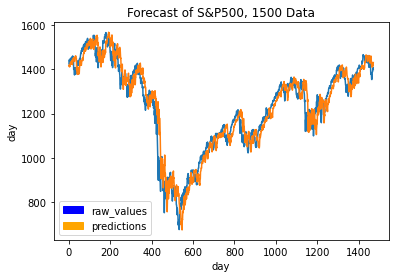

In [9]:
# 1500 Data
Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = 128,
     input_size = 14,
     output_size = 14,
     nb_epoch = 5,
                batch_size = 1,
     plot_title = 'Forecast of S&P500, 1500 Data', plot_x_title = 'day', plot_y_title = 'Price',
               convert = False, verbal = False)

Train RMSE: 78.249
Predicted=1417.479015, Expected=1416.600000
Predicted=1418.171320, Expected=1418.340000
Predicted=1410.987214, Expected=1409.710000
Predicted=1414.613548, Expected=1412.840000
Predicted=1411.467156, Expected=1412.110000
Predicted=1414.982698, Expected=1414.850000
Predicted=1424.119654, Expected=1423.820000
Predicted=1430.871609, Expected=1430.730000
Predicted=1431.700217, Expected=1431.900000
Predicted=1430.970251, Expected=1430.620000
Predicted=1427.865884, Expected=1426.370000
Predicted=1431.390099, Expected=1430.500000
Predicted=1422.192480, Expected=1422.950000
Predicted=1428.943094, Expected=1427.990000
Predicted=1439.796899, Expected=1440.130000
Predicted=1421.889415, Expected=1423.900000
Predicted=1424.491042, Expected=1422.180000
Predicted=1420.231371, Expected=1420.620000
Predicted=1429.647442, Expected=1428.820000
Predicted=1438.499880, Expected=1438.240000
Predicted=1446.295836, Expected=1445.940000
Predicted=1448.877502, Expected=1448.390000
Predicted=144

Predicted=1541.864168, Expected=1539.590000
Predicted=1543.440383, Expected=1542.840000
Predicted=1555.775033, Expected=1557.590000
Predicted=1554.709230, Expected=1552.580000
Predicted=1566.463438, Expected=1565.150000
Predicted=1560.440550, Expected=1562.470000
Predicted=1555.038490, Expected=1554.410000
Predicted=1561.785649, Expected=1561.800000
Predicted=1548.077416, Expected=1548.710000
Predicted=1540.542589, Expected=1538.530000
Predicted=1540.771360, Expected=1541.240000
Predicted=1540.807722, Expected=1540.080000
Predicted=1500.709329, Expected=1500.630000
Predicted=1508.828961, Expected=1506.330000
Predicted=1519.135803, Expected=1519.590000
Predicted=1516.629901, Expected=1515.880000
Predicted=1515.446667, Expected=1514.400000
Predicted=1537.747478, Expected=1535.280000
Predicted=1540.357957, Expected=1540.980000
Predicted=1530.751277, Expected=1531.020000
Predicted=1554.265893, Expected=1549.380000
Predicted=1507.095507, Expected=1508.440000
Predicted=1512.145763, Expected=

Predicted=1274.468055, Expected=1273.700000
Predicted=1245.979062, Expected=1244.690000
Predicted=1256.983840, Expected=1253.390000
Predicted=1238.071639, Expected=1239.490000
Predicted=1229.061435, Expected=1228.300000
Predicted=1219.519167, Expected=1214.910000
Predicted=1244.284119, Expected=1245.360000
Predicted=1258.862692, Expected=1260.320000
Predicted=1259.950600, Expected=1260.680000
Predicted=1262.807786, Expected=1260.000000
Predicted=1276.623332, Expected=1277.000000
Predicted=1282.014944, Expected=1282.190000
Predicted=1252.299293, Expected=1252.540000
Predicted=1263.841225, Expected=1257.760000
Predicted=1230.220220, Expected=1234.370000
Predicted=1265.623298, Expected=1263.200000
Predicted=1281.626677, Expected=1284.260000
Predicted=1265.968118, Expected=1267.380000
Predicted=1260.311114, Expected=1260.310000
Predicted=1249.138474, Expected=1249.010000
Predicted=1289.371227, Expected=1284.880000
Predicted=1287.642252, Expected=1289.190000
Predicted=1266.588377, Expected=

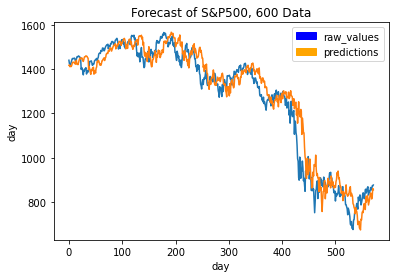

In [100]:
# 600 data
Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
                 lag = 14,
                 neurons = 128,
                 input_size = 14,
                 output_size = 14,
                 nb_epoch = 5,
                batch_size = 1,
                 plot_title = 'Forecast of S&P500, 600 Data', plot_x_title = 'day', plot_y_title = 'Price',
                convert = False, verbal = False)

# Cross Validation

input size: 1
Train RMSE: 78.379
Test RMSE: 64.646


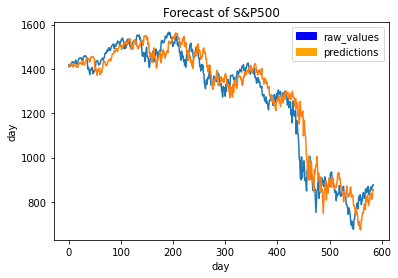

input size: 5
Train RMSE: 78.409
Test RMSE: 64.823


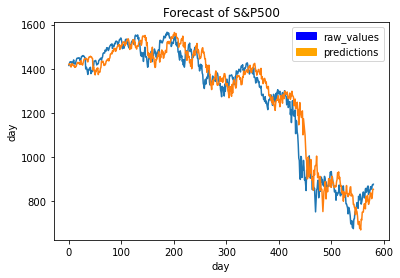

input size: 10
Train RMSE: 78.258
Test RMSE: 65.288


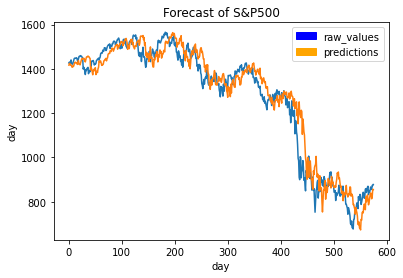

input size: 30
Train RMSE: 78.435
Test RMSE: 66.287


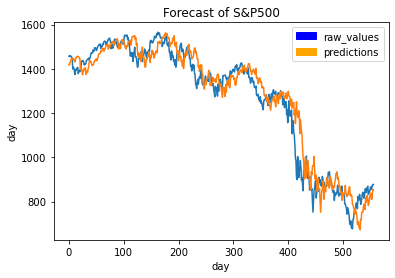

input size: 60
Train RMSE: 78.720
Test RMSE: 67.395


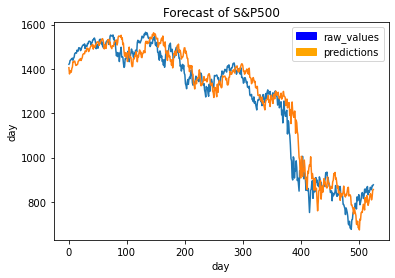

input size: 90
Train RMSE: 78.836
Test RMSE: 68.895


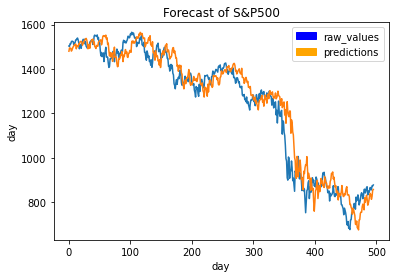

input size: 120
Train RMSE: 78.681
Test RMSE: 72.039


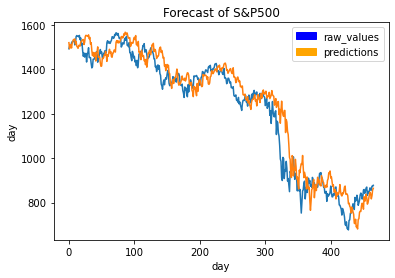

In [91]:
# input_size
input_sizes = [1, 5, 10, 30, 60, 90, 120]
for input_size in input_sizes:
    print("input size: " + str(input_size))
    Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = 128,
     input_size = input_size,
     output_size = 1,
     nb_epoch = 1,
                    batch_size = 1,
     plot_title = 'Forecast of S&P500', plot_x_title = 'day', plot_y_title = 'Price',
               convert = False, verbal = False)

input size doesn't matter.

output size: 1
Train RMSE: 78.357
Test RMSE: 64.661


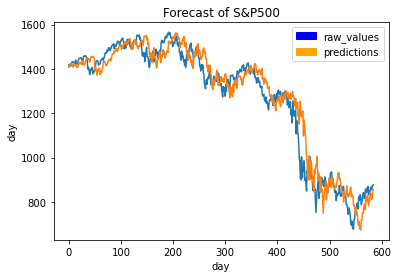

output size: 5
Train RMSE: 78.647
Test RMSE: 64.322


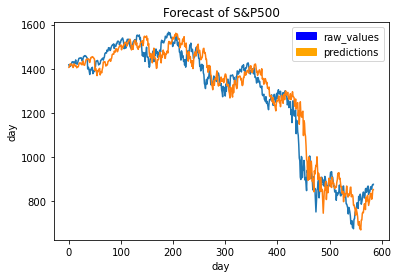

output size: 10
Train RMSE: 78.393
Test RMSE: 64.576


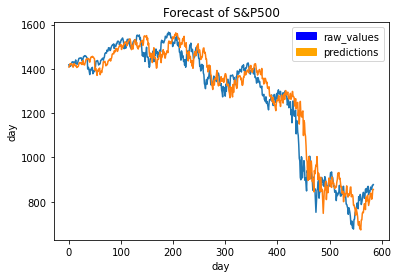

output size: 30
Train RMSE: 78.462
Test RMSE: 64.494


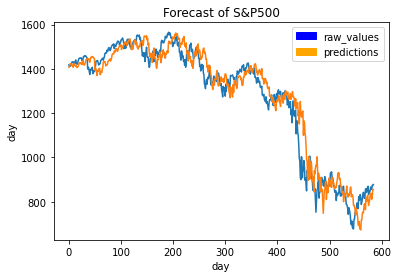

output size: 60
Train RMSE: 78.396
Test RMSE: 64.544


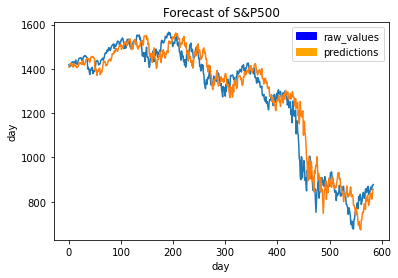

output size: 90
Train RMSE: 78.362
Test RMSE: 64.559


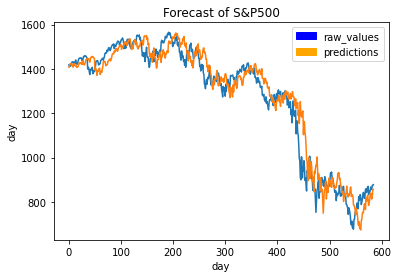

output size: 120
Train RMSE: 78.446
Test RMSE: 64.477


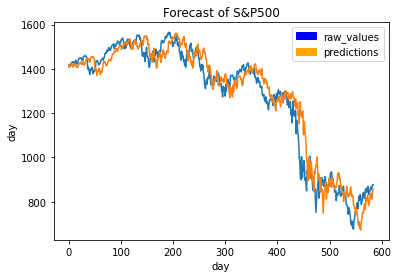

In [92]:
# output_size
output_sizes = [1, 5, 10, 30, 60, 90, 120]
for output_size in output_sizes:
    print("output size: " + str(output_size))
    Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = 128,
     input_size = 1,
     output_size = output_size,
     nb_epoch = 1,
                    batch_size = 1,
     plot_title = 'Forecast of S&P500', plot_x_title = 'day', plot_y_title = 'Price',
               convert = False, verbal = False)

Increase of output size slightly helps.

Train RMSE: 26.001
Predicted=1409.734032, Expected=1411.560000
Predicted=1412.900821, Expected=1413.210000
Predicted=1411.462577, Expected=1425.490000
Predicted=1414.077910, Expected=1427.090000
Predicted=1424.070768, Expected=1422.480000
Predicted=1430.837180, Expected=1425.550000
Predicted=1432.496892, Expected=1423.530000
Predicted=1432.368169, Expected=1418.300000
Predicted=1429.782681, Expected=1410.760000
Predicted=1432.470585, Expected=1416.900000
Predicted=1423.575021, Expected=1426.840000
Predicted=1428.984754, Expected=1424.730000
Predicted=1442.531016, Expected=1418.300000
Predicted=1426.504015, Expected=1416.600000
Predicted=1424.295019, Expected=1418.340000
Predicted=1424.680702, Expected=1409.710000
Predicted=1431.751463, Expected=1412.840000
Predicted=1441.158265, Expected=1412.110000
Predicted=1448.139148, Expected=1414.850000
Predicted=1449.248437, Expected=1423.820000
Predicted=1447.034748, Expected=1430.730000
Predicted=1448.001886, Expected=1431.900000
Predicted=145

Predicted=1546.070422, Expected=1471.560000
Predicted=1558.825213, Expected=1483.950000
Predicted=1553.724159, Expected=1484.250000
Predicted=1567.963649, Expected=1476.650000
Predicted=1563.654388, Expected=1519.780000
Predicted=1554.233610, Expected=1529.030000
Predicted=1563.704406, Expected=1518.750000
Predicted=1549.555902, Expected=1525.750000
Predicted=1541.069580, Expected=1517.730000
Predicted=1543.706224, Expected=1517.210000
Predicted=1541.186344, Expected=1525.420000
Predicted=1500.954808, Expected=1531.380000
Predicted=1505.773310, Expected=1547.040000
Predicted=1519.039012, Expected=1546.630000
Predicted=1516.874259, Expected=1539.590000
Predicted=1515.050834, Expected=1542.840000
Predicted=1534.923858, Expected=1557.590000
Predicted=1541.381285, Expected=1552.580000
Predicted=1530.621836, Expected=1565.150000
Predicted=1549.394539, Expected=1562.470000
Predicted=1510.276985, Expected=1554.410000
Predicted=1510.412001, Expected=1561.800000
Predicted=1505.968436, Expected=

Predicted=1252.055559, Expected=1350.930000
Predicted=1263.288849, Expected=1337.810000
Predicted=1246.414461, Expected=1342.830000
Predicted=1241.438522, Expected=1317.930000
Predicted=1224.855114, Expected=1318.000000
Predicted=1255.564608, Expected=1314.290000
Predicted=1267.554345, Expected=1321.970000
Predicted=1276.736515, Expected=1283.150000
Predicted=1272.120561, Expected=1278.380000
Predicted=1287.722972, Expected=1280.000000
Predicted=1291.144134, Expected=1284.910000
Predicted=1266.746509, Expected=1261.520000
Predicted=1268.376455, Expected=1262.900000
Predicted=1246.940121, Expected=1252.310000
Predicted=1269.405714, Expected=1273.700000
Predicted=1298.457568, Expected=1244.690000
Predicted=1275.810861, Expected=1253.390000
Predicted=1272.343332, Expected=1239.490000
Predicted=1261.523083, Expected=1228.300000
Predicted=1298.410767, Expected=1214.910000
Predicted=1294.779530, Expected=1245.360000
Predicted=1269.728118, Expected=1260.320000
Predicted=1299.860754, Expected=

Predicted=870.509442, Expected=832.860000
Predicted=837.309366, Expected=815.940000
Predicted=861.953541, Expected=787.530000
Predicted=849.910087, Expected=797.870000
Predicted=855.569930, Expected=811.080000
Predicted=867.398262, Expected=834.380000
Predicted=857.585401, Expected=842.500000
Predicted=856.608110, Expected=835.480000
Predicted=880.350991, Expected=815.550000
Predicted=876.203519, Expected=825.160000
Predicted=878.596933, Expected=856.560000
Predicted=907.747708, Expected=858.730000
Predicted=908.591208, Expected=841.500000
Predicted=921.684251, Expected=852.060000
Predicted=907.941919, Expected=865.300000
Predicted=929.215190, Expected=869.600000
Predicted=918.902518, Expected=832.390000
Predicted=911.825176, Expected=850.080000
Predicted=889.068453, Expected=843.550000
Predicted=895.933112, Expected=851.920000
Predicted=883.824843, Expected=866.230000
Predicted=912.442759, Expected=857.510000
Predicted=911.145084, Expected=855.160000
Predicted=904.278107, Expected=873

Predicted=1092.155505, Expected=1126.420000
Predicted=1099.790680, Expected=1115.100000
Predicted=1092.945946, Expected=1132.990000
Predicted=1097.703644, Expected=1136.520000
Predicted=1084.796578, Expected=1137.140000
Predicted=1073.770555, Expected=1141.690000
Predicted=1088.874526, Expected=1144.980000
Predicted=1102.987385, Expected=1146.980000
Predicted=1099.318102, Expected=1136.220000
Predicted=1063.811510, Expected=1145.680000
Predicted=1066.520728, Expected=1148.460000
Predicted=1059.937369, Expected=1136.030000
Predicted=1071.530428, Expected=1150.230000
Predicted=1071.875756, Expected=1138.040000
Predicted=1087.745868, Expected=1116.480000
Predicted=1089.018271, Expected=1091.760000
Predicted=1103.999671, Expected=1096.780000
Predicted=1109.562504, Expected=1092.170000
Predicted=1114.302212, Expected=1097.500000
Predicted=1119.901021, Expected=1084.530000
Predicted=1119.574463, Expected=1073.870000
Predicted=1100.963276, Expected=1089.190000
Predicted=1108.971799, Expected=

Predicted=1179.688413, Expected=1144.730000
Predicted=1182.491881, Expected=1141.200000
Predicted=1184.385864, Expected=1146.240000
Predicted=1188.982129, Expected=1137.030000
Predicted=1186.505677, Expected=1160.750000
Predicted=1183.266113, Expected=1159.970000
Predicted=1185.043445, Expected=1158.060000
Predicted=1183.654803, Expected=1165.150000
Predicted=1184.826264, Expected=1165.320000
Predicted=1193.618373, Expected=1169.770000
Predicted=1197.388066, Expected=1178.100000
Predicted=1221.277542, Expected=1173.810000
Predicted=1226.008341, Expected=1176.190000
Predicted=1222.769877, Expected=1184.710000
Predicted=1217.298197, Expected=1165.900000
Predicted=1220.177493, Expected=1178.170000
Predicted=1214.619598, Expected=1180.260000
Predicted=1199.918956, Expected=1183.080000
Predicted=1198.191039, Expected=1185.620000
Predicted=1178.913356, Expected=1185.640000
Predicted=1179.870174, Expected=1182.450000
Predicted=1197.808529, Expected=1183.780000
Predicted=1200.991855, Expected=

Predicted=1330.932758, Expected=1337.880000
Predicted=1304.174467, Expected=1339.220000
Predicted=1299.597387, Expected=1353.220000
Predicted=1292.762811, Expected=1343.800000
Predicted=1293.989119, Expected=1319.490000
Predicted=1261.132824, Expected=1313.640000
Predicted=1265.543722, Expected=1317.720000
Predicted=1207.342311, Expected=1308.870000
Predicted=1203.918327, Expected=1316.140000
Predicted=1126.703723, Expected=1305.440000
Predicted=1175.142726, Expected=1326.730000
Predicted=1123.556884, Expected=1325.840000
Predicted=1173.359371, Expected=1343.800000
Predicted=1179.251514, Expected=1345.020000
Predicted=1206.579956, Expected=1337.430000
Predicted=1195.967132, Expected=1331.940000
Predicted=1204.279178, Expected=1304.890000
Predicted=1149.588877, Expected=1300.670000
Predicted=1133.716862, Expected=1292.280000
Predicted=1133.942564, Expected=1286.940000
Predicted=1178.394204, Expected=1254.050000
Predicted=1187.913050, Expected=1260.340000
Predicted=1179.340014, Expected=

Predicted=1405.013902, Expected=1398.960000
Predicted=1407.812783, Expected=1398.080000
Predicted=1406.379972, Expected=1382.200000
Predicted=1418.840040, Expected=1358.590000
Predicted=1409.931916, Expected=1368.710000
Predicted=1395.517693, Expected=1387.570000
Predicted=1377.965372, Expected=1370.260000
Predicted=1376.874203, Expected=1369.570000
Predicted=1366.690297, Expected=1390.780000
Predicted=1358.930493, Expected=1385.140000
Predicted=1364.001295, Expected=1376.920000
Predicted=1358.186062, Expected=1378.530000
Predicted=1345.947834, Expected=1366.940000
Predicted=1335.811268, Expected=1371.970000
Predicted=1326.840420, Expected=1390.690000
Predicted=1305.592204, Expected=1399.980000
Predicted=1295.506952, Expected=1403.360000
Predicted=1317.407022, Expected=1397.910000
Predicted=1317.069464, Expected=1405.820000
Predicted=1319.962492, Expected=1402.310000
Predicted=1324.311716, Expected=1391.570000
Predicted=1327.273260, Expected=1369.100000
Predicted=1339.635168, Expected=

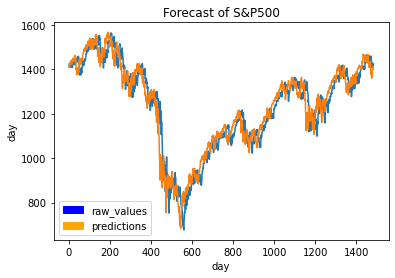

Train RMSE: 24.917
Predicted=1411.139199, Expected=1411.560000
Predicted=1414.197631, Expected=1413.210000
Predicted=1415.077335, Expected=1425.490000
Predicted=1417.436262, Expected=1427.090000
Predicted=1425.059084, Expected=1422.480000
Predicted=1432.175120, Expected=1425.550000
Predicted=1432.694964, Expected=1423.530000
Predicted=1430.516025, Expected=1418.300000
Predicted=1425.409584, Expected=1410.760000
Predicted=1430.718700, Expected=1416.900000
Predicted=1424.563787, Expected=1426.840000
Predicted=1428.886799, Expected=1424.730000
Predicted=1439.938775, Expected=1418.300000
Predicted=1423.607938, Expected=1416.600000
Predicted=1422.239641, Expected=1418.340000
Predicted=1419.593594, Expected=1409.710000
Predicted=1428.586621, Expected=1412.840000
Predicted=1437.959253, Expected=1412.110000
Predicted=1446.143214, Expected=1414.850000
Predicted=1449.875232, Expected=1423.820000
Predicted=1449.206585, Expected=1430.730000
Predicted=1449.888172, Expected=1431.900000
Predicted=145

Predicted=1544.450514, Expected=1471.560000
Predicted=1560.787857, Expected=1483.950000
Predicted=1555.137558, Expected=1484.250000
Predicted=1565.919979, Expected=1476.650000
Predicted=1568.005144, Expected=1519.780000
Predicted=1560.957563, Expected=1529.030000
Predicted=1565.250410, Expected=1518.750000
Predicted=1552.474806, Expected=1525.750000
Predicted=1540.126630, Expected=1517.730000
Predicted=1542.394605, Expected=1517.210000
Predicted=1542.256694, Expected=1525.420000
Predicted=1503.274366, Expected=1531.380000
Predicted=1510.874305, Expected=1547.040000
Predicted=1523.184762, Expected=1546.630000
Predicted=1517.458603, Expected=1539.590000
Predicted=1516.135678, Expected=1542.840000
Predicted=1538.928441, Expected=1557.590000
Predicted=1543.029524, Expected=1552.580000
Predicted=1534.604485, Expected=1565.150000
Predicted=1551.750070, Expected=1562.470000
Predicted=1509.012072, Expected=1554.410000
Predicted=1511.271811, Expected=1561.800000
Predicted=1501.628282, Expected=

Predicted=1261.818835, Expected=1339.870000
Predicted=1254.149472, Expected=1360.030000
Predicted=1275.111932, Expected=1360.140000
Predicted=1244.479525, Expected=1350.930000
Predicted=1251.837371, Expected=1337.810000
Predicted=1239.154872, Expected=1342.830000
Predicted=1225.863844, Expected=1317.930000
Predicted=1213.454335, Expected=1318.000000
Predicted=1243.842636, Expected=1314.290000
Predicted=1260.244726, Expected=1321.970000
Predicted=1258.065881, Expected=1283.150000
Predicted=1258.050323, Expected=1278.380000
Predicted=1275.778716, Expected=1280.000000
Predicted=1281.908246, Expected=1284.910000
Predicted=1250.194485, Expected=1261.520000
Predicted=1256.502793, Expected=1262.900000
Predicted=1232.313090, Expected=1252.310000
Predicted=1264.528236, Expected=1273.700000
Predicted=1282.361323, Expected=1244.690000
Predicted=1267.472403, Expected=1253.390000
Predicted=1258.735922, Expected=1239.490000
Predicted=1246.895318, Expected=1228.300000
Predicted=1282.263048, Expected=

Predicted=860.267443, Expected=768.540000
Predicted=847.971446, Expected=822.920000
Predicted=855.137816, Expected=806.120000
Predicted=868.890524, Expected=813.880000
Predicted=875.377840, Expected=832.860000
Predicted=834.284533, Expected=815.940000
Predicted=848.485764, Expected=787.530000
Predicted=844.100032, Expected=797.870000
Predicted=854.274358, Expected=811.080000
Predicted=871.510072, Expected=834.380000
Predicted=863.345038, Expected=842.500000
Predicted=858.559276, Expected=835.480000
Predicted=873.385488, Expected=815.550000
Predicted=874.215579, Expected=825.160000
Predicted=882.763836, Expected=856.560000
Predicted=912.134643, Expected=858.730000
Predicted=904.820828, Expected=841.500000
Predicted=922.030007, Expected=852.060000
Predicted=911.471980, Expected=865.300000
Predicted=933.230908, Expected=869.600000
Predicted=908.082582, Expected=832.390000
Predicted=910.340680, Expected=850.080000
Predicted=884.453595, Expected=843.550000
Predicted=894.802766, Expected=851

Predicted=1140.156893, Expected=1127.780000
Predicted=1117.845049, Expected=1126.200000
Predicted=1092.846931, Expected=1126.420000
Predicted=1096.115822, Expected=1115.100000
Predicted=1094.326428, Expected=1132.990000
Predicted=1099.736424, Expected=1136.520000
Predicted=1086.340467, Expected=1137.140000
Predicted=1075.985011, Expected=1141.690000
Predicted=1091.341920, Expected=1144.980000
Predicted=1105.289014, Expected=1146.980000
Predicted=1097.235605, Expected=1136.220000
Predicted=1064.579546, Expected=1145.680000
Predicted=1067.731701, Expected=1148.460000
Predicted=1056.228034, Expected=1136.030000
Predicted=1072.314478, Expected=1150.230000
Predicted=1067.795008, Expected=1138.040000
Predicted=1076.291379, Expected=1116.480000
Predicted=1072.490023, Expected=1091.760000
Predicted=1093.506350, Expected=1096.780000
Predicted=1097.900153, Expected=1092.170000
Predicted=1106.300707, Expected=1097.500000
Predicted=1107.380818, Expected=1084.530000
Predicted=1105.802232, Expected=

Predicted=1179.274976, Expected=1144.730000
Predicted=1180.606905, Expected=1141.200000
Predicted=1184.135428, Expected=1146.240000
Predicted=1185.161622, Expected=1137.030000
Predicted=1188.666583, Expected=1160.750000
Predicted=1184.740035, Expected=1159.970000
Predicted=1185.219822, Expected=1158.060000
Predicted=1185.493499, Expected=1165.150000
Predicted=1186.119414, Expected=1165.320000
Predicted=1195.612980, Expected=1169.770000
Predicted=1200.876468, Expected=1178.100000
Predicted=1222.616969, Expected=1173.810000
Predicted=1227.425534, Expected=1176.190000
Predicted=1225.812168, Expected=1184.710000
Predicted=1212.839492, Expected=1165.900000
Predicted=1220.253481, Expected=1178.170000
Predicted=1215.026646, Expected=1180.260000
Predicted=1200.789131, Expected=1183.080000
Predicted=1199.355721, Expected=1185.620000
Predicted=1179.569052, Expected=1185.640000
Predicted=1179.063645, Expected=1182.450000
Predicted=1197.284588, Expected=1183.780000
Predicted=1200.117312, Expected=

Predicted=1344.830193, Expected=1339.670000
Predicted=1337.908797, Expected=1337.880000
Predicted=1309.745736, Expected=1339.220000
Predicted=1306.733816, Expected=1353.220000
Predicted=1295.530897, Expected=1343.800000
Predicted=1286.206173, Expected=1319.490000
Predicted=1253.037195, Expected=1313.640000
Predicted=1260.201477, Expected=1317.720000
Predicted=1198.872707, Expected=1308.870000
Predicted=1199.586094, Expected=1316.140000
Predicted=1118.271000, Expected=1305.440000
Predicted=1174.649927, Expected=1326.730000
Predicted=1122.249943, Expected=1325.840000
Predicted=1176.538582, Expected=1343.800000
Predicted=1182.159444, Expected=1345.020000
Predicted=1205.818866, Expected=1337.430000
Predicted=1192.999300, Expected=1331.940000
Predicted=1191.678019, Expected=1304.890000
Predicted=1138.906675, Expected=1300.670000
Predicted=1121.416313, Expected=1292.280000
Predicted=1121.810359, Expected=1286.940000
Predicted=1159.176033, Expected=1254.050000
Predicted=1176.373197, Expected=

Predicted=1374.200136, Expected=1419.040000
Predicted=1391.525142, Expected=1413.380000
Predicted=1398.870789, Expected=1398.960000
Predicted=1402.605363, Expected=1398.080000
Predicted=1395.776170, Expected=1382.200000
Predicted=1402.803812, Expected=1358.590000
Predicted=1401.554144, Expected=1368.710000
Predicted=1393.479136, Expected=1387.570000
Predicted=1368.300031, Expected=1370.260000
Predicted=1369.094202, Expected=1369.570000
Predicted=1366.321626, Expected=1390.780000
Predicted=1355.724943, Expected=1385.140000
Predicted=1357.745363, Expected=1376.920000
Predicted=1353.528065, Expected=1378.530000
Predicted=1337.067366, Expected=1366.940000
Predicted=1330.522895, Expected=1371.970000
Predicted=1327.344124, Expected=1390.690000
Predicted=1308.384741, Expected=1399.980000
Predicted=1298.557505, Expected=1403.360000
Predicted=1317.654727, Expected=1397.910000
Predicted=1319.179066, Expected=1405.820000
Predicted=1320.258412, Expected=1402.310000
Predicted=1320.283958, Expected=

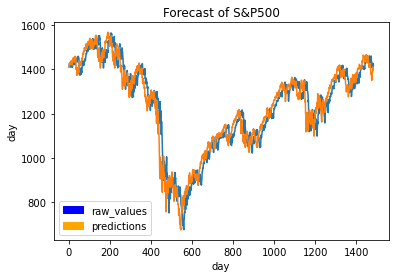

Train RMSE: 25.327
Predicted=1410.310402, Expected=1411.560000
Predicted=1413.445429, Expected=1413.210000
Predicted=1411.423857, Expected=1425.490000
Predicted=1414.759721, Expected=1427.090000
Predicted=1424.558248, Expected=1422.480000
Predicted=1431.249842, Expected=1425.550000
Predicted=1432.871126, Expected=1423.530000
Predicted=1432.148040, Expected=1418.300000
Predicted=1428.465926, Expected=1410.760000
Predicted=1431.745321, Expected=1416.900000
Predicted=1423.090869, Expected=1426.840000
Predicted=1428.791680, Expected=1424.730000
Predicted=1441.624924, Expected=1418.300000
Predicted=1425.496501, Expected=1416.600000
Predicted=1423.534229, Expected=1418.340000
Predicted=1422.694253, Expected=1409.710000
Predicted=1430.395202, Expected=1412.840000
Predicted=1439.841531, Expected=1412.110000
Predicted=1447.193925, Expected=1414.850000
Predicted=1448.646927, Expected=1423.820000
Predicted=1446.863299, Expected=1430.730000
Predicted=1448.242773, Expected=1431.900000
Predicted=145

Predicted=1538.520112, Expected=1471.490000
Predicted=1542.807896, Expected=1471.560000
Predicted=1556.378119, Expected=1483.950000
Predicted=1552.280338, Expected=1484.250000
Predicted=1565.955022, Expected=1476.650000
Predicted=1556.847012, Expected=1519.780000
Predicted=1551.360274, Expected=1529.030000
Predicted=1561.019246, Expected=1518.750000
Predicted=1547.353855, Expected=1525.750000
Predicted=1538.774729, Expected=1517.730000
Predicted=1541.689554, Expected=1517.210000
Predicted=1539.803038, Expected=1525.420000
Predicted=1500.240570, Expected=1531.380000
Predicted=1504.499368, Expected=1547.040000
Predicted=1519.031668, Expected=1546.630000
Predicted=1516.430809, Expected=1539.590000
Predicted=1514.716737, Expected=1542.840000
Predicted=1534.046397, Expected=1557.590000
Predicted=1541.229653, Expected=1552.580000
Predicted=1529.916303, Expected=1565.150000
Predicted=1549.457006, Expected=1562.470000
Predicted=1509.507177, Expected=1554.410000
Predicted=1509.884880, Expected=

Predicted=1286.424174, Expected=1358.440000
Predicted=1264.256621, Expected=1335.490000
Predicted=1265.008773, Expected=1339.870000
Predicted=1251.526378, Expected=1360.030000
Predicted=1273.845474, Expected=1360.140000
Predicted=1245.933163, Expected=1350.930000
Predicted=1255.581158, Expected=1337.810000
Predicted=1240.959219, Expected=1342.830000
Predicted=1231.067730, Expected=1317.930000
Predicted=1217.507139, Expected=1318.000000
Predicted=1247.953520, Expected=1314.290000
Predicted=1261.763836, Expected=1321.970000
Predicted=1263.460097, Expected=1283.150000
Predicted=1263.159259, Expected=1278.380000
Predicted=1279.584262, Expected=1280.000000
Predicted=1283.931734, Expected=1284.910000
Predicted=1255.439513, Expected=1261.520000
Predicted=1260.346267, Expected=1262.900000
Predicted=1237.391279, Expected=1252.310000
Predicted=1263.015446, Expected=1273.700000
Predicted=1286.344415, Expected=1244.690000
Predicted=1268.324055, Expected=1253.390000
Predicted=1262.455616, Expected=

Predicted=859.307843, Expected=768.540000
Predicted=833.910211, Expected=822.920000
Predicted=850.872966, Expected=806.120000
Predicted=863.124855, Expected=813.880000
Predicted=866.108585, Expected=832.860000
Predicted=832.196214, Expected=815.940000
Predicted=851.567367, Expected=787.530000
Predicted=843.628417, Expected=797.870000
Predicted=850.843402, Expected=811.080000
Predicted=862.930831, Expected=834.380000
Predicted=855.249321, Expected=842.500000
Predicted=854.684414, Expected=835.480000
Predicted=874.881061, Expected=815.550000
Predicted=872.802531, Expected=825.160000
Predicted=873.518496, Expected=856.560000
Predicted=905.528155, Expected=858.730000
Predicted=904.226910, Expected=841.500000
Predicted=918.648165, Expected=852.060000
Predicted=905.670138, Expected=865.300000
Predicted=928.156921, Expected=869.600000
Predicted=910.727968, Expected=832.390000
Predicted=907.274679, Expected=850.080000
Predicted=884.461242, Expected=843.550000
Predicted=892.754121, Expected=851

Predicted=1150.042583, Expected=1126.480000
Predicted=1138.210226, Expected=1127.780000
Predicted=1117.129124, Expected=1126.200000
Predicted=1092.551907, Expected=1126.420000
Predicted=1098.621943, Expected=1115.100000
Predicted=1091.541692, Expected=1132.990000
Predicted=1097.330861, Expected=1136.520000
Predicted=1084.739923, Expected=1137.140000
Predicted=1073.878867, Expected=1141.690000
Predicted=1089.258817, Expected=1144.980000
Predicted=1103.555832, Expected=1146.980000
Predicted=1098.721766, Expected=1136.220000
Predicted=1063.372182, Expected=1145.680000
Predicted=1066.564297, Expected=1148.460000
Predicted=1058.386025, Expected=1136.030000
Predicted=1070.283220, Expected=1150.230000
Predicted=1069.522097, Expected=1138.040000
Predicted=1081.057680, Expected=1116.480000
Predicted=1079.019256, Expected=1091.760000
Predicted=1097.713697, Expected=1096.780000
Predicted=1102.315952, Expected=1092.170000
Predicted=1108.652436, Expected=1097.500000
Predicted=1111.855245, Expected=

Predicted=1165.677411, Expected=1147.700000
Predicted=1178.739365, Expected=1144.730000
Predicted=1181.331108, Expected=1141.200000
Predicted=1183.646947, Expected=1146.240000
Predicted=1187.223431, Expected=1137.030000
Predicted=1183.865167, Expected=1160.750000
Predicted=1182.158175, Expected=1159.970000
Predicted=1184.067214, Expected=1158.060000
Predicted=1182.979501, Expected=1165.150000
Predicted=1184.625602, Expected=1165.320000
Predicted=1193.609856, Expected=1169.770000
Predicted=1197.433834, Expected=1178.100000
Predicted=1221.585465, Expected=1173.810000
Predicted=1226.279535, Expected=1176.190000
Predicted=1222.955352, Expected=1184.710000
Predicted=1215.002940, Expected=1165.900000
Predicted=1218.688148, Expected=1178.170000
Predicted=1213.837727, Expected=1180.260000
Predicted=1199.503952, Expected=1183.080000
Predicted=1198.084777, Expected=1185.620000
Predicted=1178.969459, Expected=1185.640000
Predicted=1179.712248, Expected=1182.450000
Predicted=1197.715281, Expected=

Predicted=1342.869455, Expected=1320.640000
Predicted=1334.092191, Expected=1339.670000
Predicted=1330.630456, Expected=1337.880000
Predicted=1304.005571, Expected=1339.220000
Predicted=1298.621817, Expected=1353.220000
Predicted=1292.346400, Expected=1343.800000
Predicted=1288.673302, Expected=1319.490000
Predicted=1256.132679, Expected=1313.640000
Predicted=1261.813567, Expected=1317.720000
Predicted=1202.248941, Expected=1308.870000
Predicted=1200.557625, Expected=1316.140000
Predicted=1121.573097, Expected=1305.440000
Predicted=1171.583715, Expected=1326.730000
Predicted=1120.927535, Expected=1325.840000
Predicted=1170.743193, Expected=1343.800000
Predicted=1178.098035, Expected=1345.020000
Predicted=1205.005076, Expected=1337.430000
Predicted=1193.895711, Expected=1331.940000
Predicted=1196.440310, Expected=1304.890000
Predicted=1143.408964, Expected=1300.670000
Predicted=1126.582446, Expected=1292.280000
Predicted=1126.932820, Expected=1286.940000
Predicted=1166.054221, Expected=

Predicted=1405.255672, Expected=1398.080000
Predicted=1400.707193, Expected=1382.200000
Predicted=1409.436946, Expected=1358.590000
Predicted=1404.628353, Expected=1368.710000
Predicted=1391.132423, Expected=1387.570000
Predicted=1370.702245, Expected=1370.260000
Predicted=1371.123890, Expected=1369.570000
Predicted=1362.347141, Expected=1390.780000
Predicted=1354.930671, Expected=1385.140000
Predicted=1359.228476, Expected=1376.920000
Predicted=1354.441637, Expected=1378.530000
Predicted=1340.396789, Expected=1366.940000
Predicted=1332.000061, Expected=1371.970000
Predicted=1323.705823, Expected=1390.690000
Predicted=1303.702468, Expected=1399.980000
Predicted=1294.536288, Expected=1403.360000
Predicted=1316.403641, Expected=1397.910000
Predicted=1316.289634, Expected=1405.820000
Predicted=1319.437292, Expected=1402.310000
Predicted=1322.292721, Expected=1391.570000
Predicted=1320.589437, Expected=1369.100000
Predicted=1334.955857, Expected=1369.580000
Predicted=1316.027060, Expected=

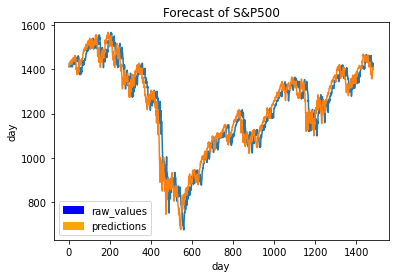

Train RMSE: 25.304
Predicted=1410.563864, Expected=1411.560000
Predicted=1413.692688, Expected=1413.210000
Predicted=1411.751765, Expected=1425.490000
Predicted=1415.006829, Expected=1427.090000
Predicted=1424.843322, Expected=1422.480000
Predicted=1431.527940, Expected=1425.550000
Predicted=1433.070365, Expected=1423.530000
Predicted=1432.268160, Expected=1418.300000
Predicted=1428.448462, Expected=1410.760000
Predicted=1431.496710, Expected=1416.900000
Predicted=1422.944561, Expected=1426.840000
Predicted=1428.702323, Expected=1424.730000
Predicted=1441.614380, Expected=1418.300000
Predicted=1425.418089, Expected=1416.600000
Predicted=1423.376771, Expected=1418.340000
Predicted=1422.524056, Expected=1409.710000
Predicted=1430.069012, Expected=1412.840000
Predicted=1439.538204, Expected=1412.110000
Predicted=1446.915987, Expected=1414.850000
Predicted=1448.490711, Expected=1423.820000
Predicted=1446.856256, Expected=1430.730000
Predicted=1448.336991, Expected=1431.900000
Predicted=145

Predicted=1552.578950, Expected=1484.250000
Predicted=1566.298364, Expected=1476.650000
Predicted=1559.359891, Expected=1519.780000
Predicted=1551.857256, Expected=1529.030000
Predicted=1561.318097, Expected=1518.750000
Predicted=1548.279012, Expected=1525.750000
Predicted=1539.430482, Expected=1517.730000
Predicted=1542.337596, Expected=1517.210000
Predicted=1540.334882, Expected=1525.420000
Predicted=1500.687763, Expected=1531.380000
Predicted=1505.165774, Expected=1547.040000
Predicted=1519.422929, Expected=1546.630000
Predicted=1516.892002, Expected=1539.590000
Predicted=1515.174734, Expected=1542.840000
Predicted=1534.584196, Expected=1557.590000
Predicted=1541.494946, Expected=1552.580000
Predicted=1530.462920, Expected=1565.150000
Predicted=1549.801528, Expected=1562.470000
Predicted=1509.871692, Expected=1554.410000
Predicted=1510.175824, Expected=1561.800000
Predicted=1503.935469, Expected=1548.710000
Predicted=1522.582968, Expected=1538.530000
Predicted=1477.120119, Expected=

Predicted=1273.564198, Expected=1360.140000
Predicted=1245.859469, Expected=1350.930000
Predicted=1255.536454, Expected=1337.810000
Predicted=1240.649214, Expected=1342.830000
Predicted=1230.753134, Expected=1317.930000
Predicted=1216.747683, Expected=1318.000000
Predicted=1247.241253, Expected=1314.290000
Predicted=1261.036320, Expected=1321.970000
Predicted=1262.835868, Expected=1283.150000
Predicted=1262.128374, Expected=1278.380000
Predicted=1278.524213, Expected=1280.000000
Predicted=1283.045629, Expected=1284.910000
Predicted=1254.800423, Expected=1261.520000
Predicted=1259.370858, Expected=1262.900000
Predicted=1236.621214, Expected=1252.310000
Predicted=1262.401092, Expected=1273.700000
Predicted=1285.506490, Expected=1244.690000
Predicted=1267.675254, Expected=1253.390000
Predicted=1261.973026, Expected=1239.490000
Predicted=1251.326962, Expected=1228.300000
Predicted=1287.652254, Expected=1214.910000
Predicted=1287.626446, Expected=1245.360000
Predicted=1264.081652, Expected=

Predicted=859.935622, Expected=768.540000
Predicted=837.988349, Expected=822.920000
Predicted=850.586760, Expected=806.120000
Predicted=864.264368, Expected=813.880000
Predicted=867.509424, Expected=832.860000
Predicted=832.499168, Expected=815.940000
Predicted=851.968788, Expected=787.530000
Predicted=843.949240, Expected=797.870000
Predicted=851.214636, Expected=811.080000
Predicted=863.863205, Expected=834.380000
Predicted=855.701240, Expected=842.500000
Predicted=855.066998, Expected=835.480000
Predicted=875.285313, Expected=815.550000
Predicted=873.180932, Expected=825.160000
Predicted=874.894158, Expected=856.560000
Predicted=905.753304, Expected=858.730000
Predicted=904.432658, Expected=841.500000
Predicted=919.288903, Expected=852.060000
Predicted=906.344948, Expected=865.300000
Predicted=928.696988, Expected=869.600000
Predicted=910.648008, Expected=832.390000
Predicted=907.629354, Expected=850.080000
Predicted=884.524577, Expected=843.550000
Predicted=893.056764, Expected=851

Predicted=1145.450814, Expected=1114.050000
Predicted=1148.454615, Expected=1118.020000
Predicted=1136.305715, Expected=1120.590000
Predicted=1150.311770, Expected=1126.480000
Predicted=1138.490453, Expected=1127.780000
Predicted=1117.417338, Expected=1126.200000
Predicted=1092.800550, Expected=1126.420000
Predicted=1098.757220, Expected=1115.100000
Predicted=1091.670491, Expected=1132.990000
Predicted=1097.375793, Expected=1136.520000
Predicted=1084.929940, Expected=1137.140000
Predicted=1074.168523, Expected=1141.690000
Predicted=1089.562603, Expected=1144.980000
Predicted=1103.868177, Expected=1146.980000
Predicted=1098.943572, Expected=1136.220000
Predicted=1063.504927, Expected=1145.680000
Predicted=1066.666421, Expected=1148.460000
Predicted=1058.448065, Expected=1136.030000
Predicted=1070.352073, Expected=1150.230000
Predicted=1069.425854, Expected=1138.040000
Predicted=1080.961519, Expected=1116.480000
Predicted=1078.681196, Expected=1091.760000
Predicted=1096.514559, Expected=

Predicted=1179.214028, Expected=1134.280000
Predicted=1175.723918, Expected=1124.830000
Predicted=1174.958954, Expected=1148.670000
Predicted=1184.963649, Expected=1142.160000
Predicted=1166.021482, Expected=1147.700000
Predicted=1179.034370, Expected=1144.730000
Predicted=1181.602727, Expected=1141.200000
Predicted=1183.828735, Expected=1146.240000
Predicted=1187.306631, Expected=1137.030000
Predicted=1184.323041, Expected=1160.750000
Predicted=1182.203679, Expected=1159.970000
Predicted=1184.346511, Expected=1158.060000
Predicted=1183.368410, Expected=1165.150000
Predicted=1184.953861, Expected=1165.320000
Predicted=1193.974601, Expected=1169.770000
Predicted=1197.833971, Expected=1178.100000
Predicted=1221.881941, Expected=1173.810000
Predicted=1226.612899, Expected=1176.190000
Predicted=1223.292998, Expected=1184.710000
Predicted=1215.078397, Expected=1165.900000
Predicted=1218.769526, Expected=1178.170000
Predicted=1213.894402, Expected=1180.260000
Predicted=1199.665226, Expected=

Predicted=1316.467418, Expected=1295.520000
Predicted=1309.234797, Expected=1287.140000
Predicted=1317.220226, Expected=1283.500000
Predicted=1307.616734, Expected=1268.450000
Predicted=1327.103425, Expected=1280.100000
Predicted=1324.725352, Expected=1296.670000
Predicted=1342.540520, Expected=1307.410000
Predicted=1343.416070, Expected=1320.640000
Predicted=1335.029730, Expected=1339.670000
Predicted=1330.992570, Expected=1337.880000
Predicted=1304.742281, Expected=1339.220000
Predicted=1299.597491, Expected=1353.220000
Predicted=1292.834700, Expected=1343.800000
Predicted=1289.049715, Expected=1319.490000
Predicted=1256.244575, Expected=1313.640000
Predicted=1261.630847, Expected=1317.720000
Predicted=1202.039543, Expected=1308.870000
Predicted=1200.189318, Expected=1316.140000
Predicted=1121.268288, Expected=1305.440000
Predicted=1171.544849, Expected=1326.730000
Predicted=1120.747407, Expected=1325.840000
Predicted=1171.186641, Expected=1343.800000
Predicted=1178.300105, Expected=

Predicted=1370.751920, Expected=1397.110000
Predicted=1389.725898, Expected=1416.510000
Predicted=1385.337630, Expected=1412.520000
Predicted=1378.150744, Expected=1405.540000
Predicted=1379.964512, Expected=1403.280000
Predicted=1367.718741, Expected=1408.470000
Predicted=1371.777267, Expected=1419.040000
Predicted=1391.573580, Expected=1413.380000
Predicted=1402.021674, Expected=1398.960000
Predicted=1405.090280, Expected=1398.080000
Predicted=1400.477196, Expected=1382.200000
Predicted=1409.019980, Expected=1358.590000
Predicted=1403.350176, Expected=1368.710000
Predicted=1390.511391, Expected=1387.570000
Predicted=1369.999427, Expected=1370.260000
Predicted=1370.704261, Expected=1369.570000
Predicted=1362.431550, Expected=1390.780000
Predicted=1354.736226, Expected=1385.140000
Predicted=1359.282517, Expected=1376.920000
Predicted=1354.484987, Expected=1378.530000
Predicted=1340.371550, Expected=1366.940000
Predicted=1331.756228, Expected=1371.970000
Predicted=1323.785405, Expected=

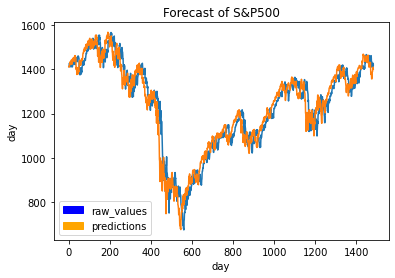

In [30]:
# nb_epoch
nb_epochs = [1, 5, 10, 20]
for nb_epoch in nb_epochs:
    print("epoch number: " + str(nb_epoch) )
    Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = neuron,
     input_size = 1,
     output_size = 1,
     nb_epoch = nb_epoch,
                    batch_size = 1,
     plot_title = 'Forecast of S&P500', plot_x_title = 'day', plot_y_title = 'Price',
               convert = False, verbal = False)

Number of epochs:5

Train RMSE: 78.030
Test RMSE: 66.543


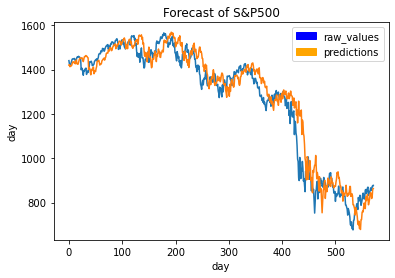

Train RMSE: 78.079
Test RMSE: 66.256


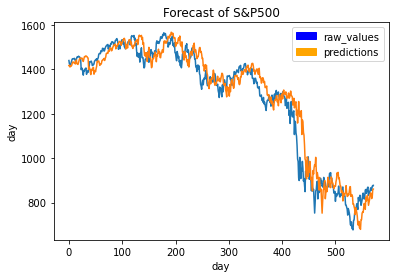

Train RMSE: 78.029
Test RMSE: 65.895


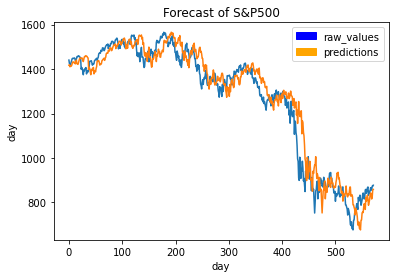

Train RMSE: 78.189
Test RMSE: 65.710


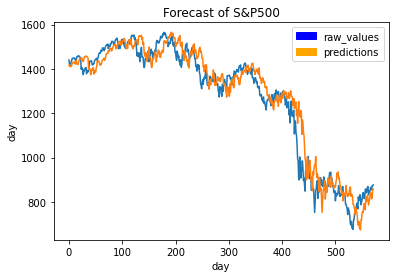

Train RMSE: 78.303
Test RMSE: 65.536


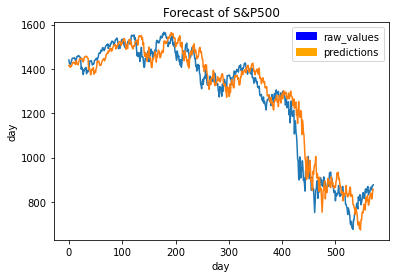

In [90]:
# neurons
neurons = [4, 10, 32, 64, 128]
for neuron in neurons:
    print("neurons: " + str(neuron))
    Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
                 lag = 14,
                 neurons = neuron,
                 input_size = 14,
                 output_size = 14,
                 nb_epoch = 5,
                    batch_size = 1,
                 plot_title = 'Forecast of S&P500', plot_x_title = 'day', plot_y_title = 'Price',
                           convert = False, verbal = False)

Increase of neuron number slightly helps.

# Different Lags

Lag: 1
Train RMSE: 8.136
Test RMSE: 21.101


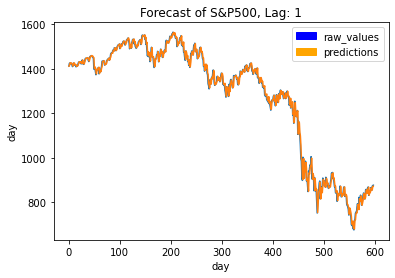

Lag: 5
Train RMSE: 16.858
Test RMSE: 39.444


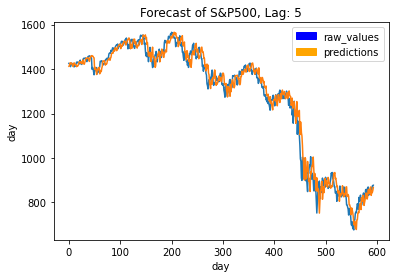

Lag: 14
Train RMSE: 23.686
Test RMSE: 66.127


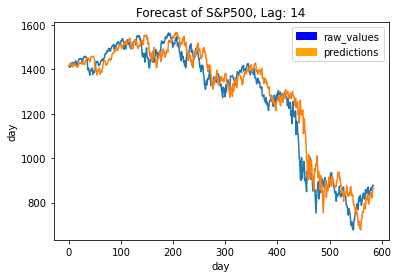

Lag: 30
Train RMSE: 39.526
Test RMSE: 100.966


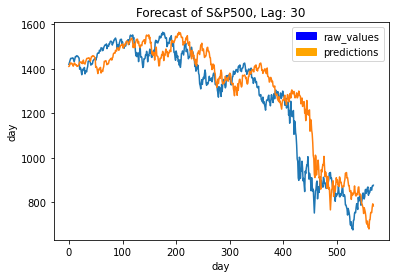

In [17]:
lags = [1, 5, 14, 30]
for lag in lags:
    print("Lag: " + str(lag))
    Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
         lag = lag,
         neurons = 4,
         input_size = 1,
         output_size = 1,
         nb_epoch = 5,
                    batch_size = 1,
         plot_title = 'Forecast of S&P500, Lag: ' + str(lag), plot_x_title = 'day', plot_y_title = 'Price',
                   convert = False, verbal = False)

# Check the effect of conversion

Train RMSE: 134.195


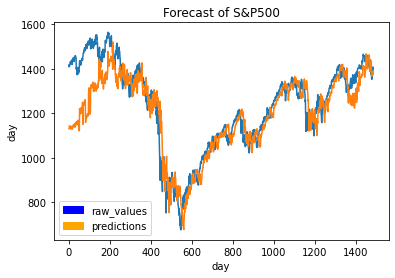

Test RMSE: 100.031


In [77]:
# 1500 data
Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = neuron,
     input_size = 1,
     output_size = 1,
     nb_epoch = 5,
                    batch_size = 1,
     plot_title = 'Forecast of S&P500, 1500 Data Converted', plot_x_title = 'day', plot_y_title = 'Price',
               convert = True, verbal = False)

Train RMSE: 91.096


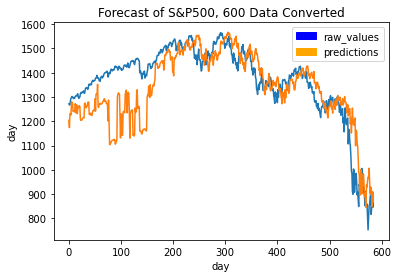

Test RMSE: 107.044


In [24]:
# 600 data
Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = 4,
     input_size = 1,
     output_size = 1,
     nb_epoch = 5,
                batch_size = 1,
     plot_title = 'Forecast of S&P500, 600 Data Converted', plot_x_title = 'day', plot_y_title = 'Price',
               convert = True, verbal = False)

Train RMSE: 134.124


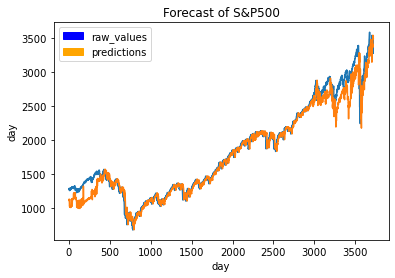

Test RMSE: 134.124


In [81]:
# all data
Serialized_LSTM(sp500_train['Price'], sp500_test['Price'], yield_train = yield_train, yield_test = yield_test,
     lag = 14,
     neurons = neuron,
     input_size = 1,
     output_size = 1,
     nb_epoch = 5,
                batch_size = 1, 
     plot_title = 'Forecast of S&P500, All Data Converted', plot_x_title = 'day', plot_y_title = 'Price',
               convert = True, verbal = False)